In [1]:
import sys
import pickle
sys.path.append('../..')
import pandas as pd
import matplotlib.pyplot as plt
from lstm import transf_chik_pred
from lstm import apply_dengue_chik
from preprocessing import get_nn_data
from lstm import build_model, transf_chik_pred
from pgbm_model import  cross_dengue_chik_prediction
import matplotlib.dates as mdates
from plots_pgbm import predicted_vs_observed as p_o_pgbm
from plots_lstm import predicted_vs_observed as p_o_lstm
fmt = mdates.DateFormatter('%d-%b\n%Y')

In [2]:
CITY = 3304557
CITY_NAME = 'Rio de Janeiro'
STATE = 'RJ'
FILENAME_DATA = f'../../data/chik_{CITY}_cluster.csv'

In [3]:
df_chik = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0' )
df_chik.index = pd.to_datetime(df_chik.index)
df_chik

,casos_3303203,casos_est_3303203,casos_est_min_3303203,casos_est_max_3303203,p_rt1_3303203,p_inc100k_3303203,temp_min_3303203,temp_max_3303203,umid_min_3303203,pressao_min_3303203,...,casos_3304557,casos_est_3304557,casos_est_min_3304557,casos_est_max_3304557,p_rt1_3304557,p_inc100k_3304557,temp_min_3304557,temp_max_3304557,umid_min_3304557,pressao_min_3304557
2010-01-03,0,0.0,0,0,0.0,0.0,24.333333,33.000000,42.000000,1009.666667,...,0,0.0,0,0,0.000000,0.000000,24.333333,33.000000,42.000000,1009.666667
2010-01-10,0,0.0,0,0,0.0,0.0,25.428571,34.000000,43.285714,1008.000000,...,0,0.0,0,0,0.000000,0.000000,25.428571,34.000000,43.285714,1008.000000
2010-01-17,0,0.0,0,0,0.0,0.0,24.142857,34.000000,43.857143,1010.285714,...,0,0.0,0,0,0.000000,0.000000,24.142857,34.000000,43.857143,1010.285714
2010-01-24,0,0.0,0,0,0.0,0.0,23.714286,34.285714,39.285714,1009.000000,...,0,0.0,0,0,0.000000,0.000000,23.714286,34.285714,39.285714,1009.000000
2010-01-31,0,0.0,0,0,0.0,0.0,23.857143,33.857143,41.285714,1009.857143,...,0,0.0,0,0,0.000000,0.000000,23.857143,33.857143,41.285714,1009.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-05,0,0.0,0,0,0.0,0.0,19.285714,24.428571,69.148014,1013.857143,...,7,10.0,7,14,0.034802,0.148196,19.285714,24.428571,69.148014,1013.857143
2022-06-12,0,0.0,0,0,0.0,0.0,17.571429,22.714286,71.092771,1013.714286,...,8,12.0,9,19,0.102687,0.177835,17.571429,22.714286,71.092771,1013.714286
2022-06-19,0,0.0,0,0,0.0,0.0,15.571429,23.000000,59.035314,1016.428571,...,15,22.0,17,30,0.871627,0.326031,15.571429,23.000000,59.035314,1016.428571
2022-06-26,0,0.0,0,0,0.0,0.0,17.285714,25.857143,58.679486,1016.857143,...,6,16.0,9,27,0.587232,0.237114,17.285714,25.857143,58.679486,1016.857143


<AxesSubplot:>

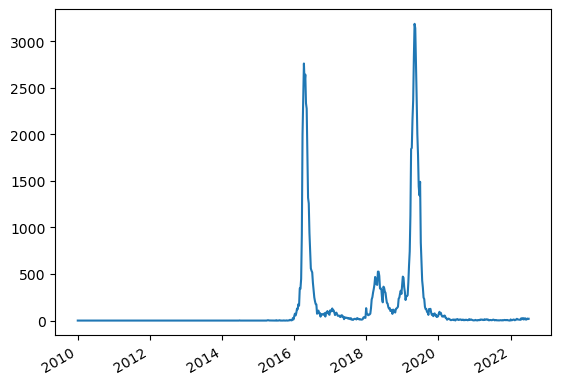

In [4]:
df_chik[f'casos_est_{CITY}'].plot()

In [5]:
INI_DATE = '2015-11-01'
END_DATE = '2022-07-01'

PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
EPOCHS = 400
HIDDEN = 8
FEAT = df_chik.shape[1] +1 # number of features 

Apply the dengue model:

2023-01-17 11:41:55.307116: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


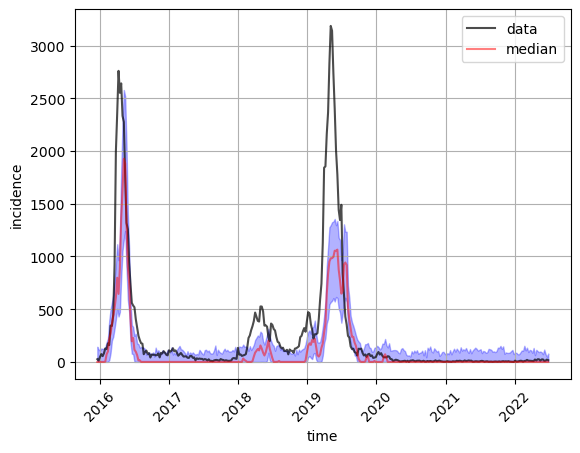

In [6]:
metrics = apply_dengue_chik(CITY, ini_date = INI_DATE, 
                         end_date = END_DATE, look_back = LOOK_BACK,
                         predict_n = PREDICT_N,  label_m = f'msle_all', filename = FILENAME_DATA )

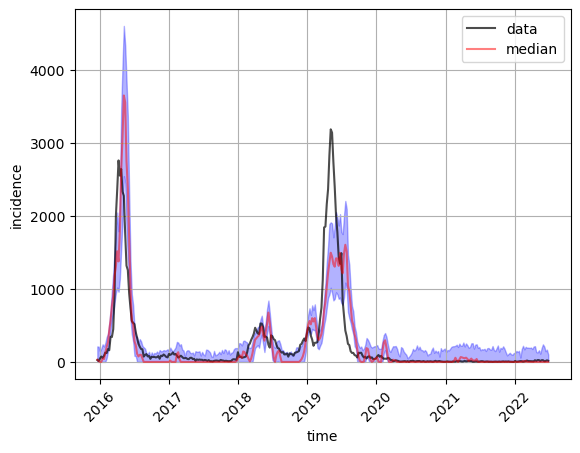

In [7]:
metrics = apply_dengue_chik(CITY, ini_date = INI_DATE, 
                         end_date = END_DATE, look_back = LOOK_BACK,
                         predict_n = PREDICT_N,  label_m = f'custom_msle_all',  filename = FILENAME_DATA )

Applying the **transfer learning** techinique:

- Using the model trained with `loss = 'msle'`:


Compilation Time :  0.002445220947265625
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 51)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3840      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0

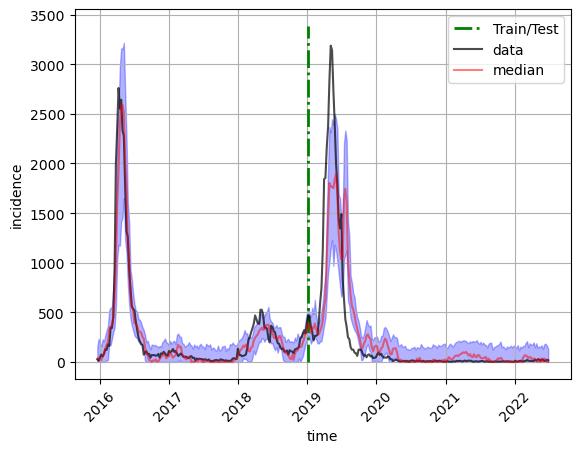

In [8]:

END_DATE_TRAIN = f'2019-01-01'

model = build_model(hidden = 8, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

    
m_msle, m_t, m_val = transf_chik_pred(model, CITY, ini_date = INI_DATE, end_train_date = END_DATE_TRAIN,  
                                end_date = END_DATE, filename = f'../../saved_models/lstm/trained_{CITY}_model_msle_all.h5',  epochs= EPOCHS, features = FEAT,  
                                predict_n = PREDICT_N, look_back = LOOK_BACK, loss = 'msle' , validation_split = 0.0,
                                label = f'transf_msle',  filename_data = FILENAME_DATA )

Compilation Time :  0.001397848129272461
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 51)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             3840      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                

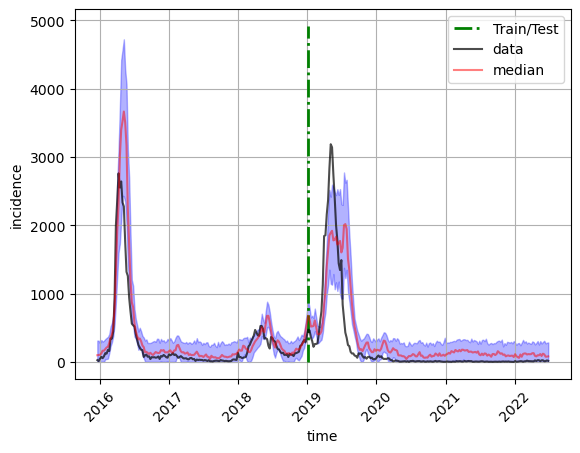

In [9]:
from lstm import custom_loss_msle

model = build_model(hidden = 8, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = custom_loss_msle(p=10))

    
m_msle, m_t, m_val = transf_chik_pred(model, CITY, ini_date = INI_DATE, end_train_date = END_DATE_TRAIN,  
                                end_date = END_DATE, filename = f'../../saved_models/lstm/trained_{CITY}_model_custom_msle_all.h5',  epochs= EPOCHS, features = FEAT,  
                                predict_n = PREDICT_N, look_back = LOOK_BACK, loss = custom_loss_msle(p=10) , validation_split = 0.0,
                                label = f'transf_custom_msle',  filename_data = FILENAME_DATA)

Apply the pgbm model:

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


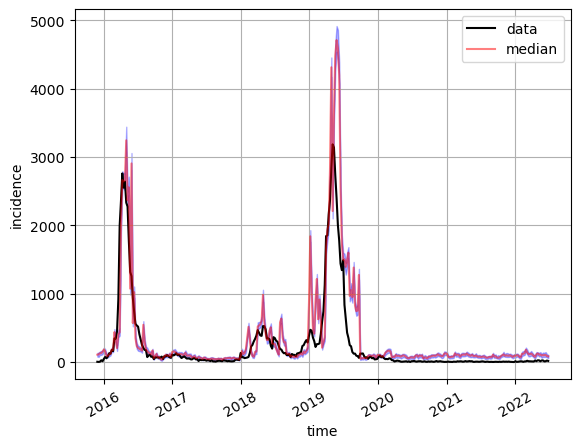

In [10]:
preds, preds25, preds975, X_data, targets = cross_dengue_chik_prediction(CITY, STATE, predict_n = PREDICT_N, look_back = LOOK_BACK, ini_date = INI_DATE, end_date = END_DATE,  filename = FILENAME_DATA)
    